<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Pipeline de Dados do Telegram I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

Aluno: Raul Pichinin

# **Tópicos**

<ol type="1">
  <li>Contexto;</li>
  <li>Telegram;</li>
  <li>Dados.</li>
</ol>

---

# **Exercícios**

## 1\. Telegram.

1.1. Crie uma conta no **Telegram** caso não possua uma e faça o login na versão web da ferramenta através desse [link](https://web.telegram.org).

1.6. Envie diversos tipos de mensagens no grupo (text, imagem, arquivos, video, áudio, etc.) e as consuma utilizand a API de *bots* do **Telegram**.

> **Nota:** A documentação completa da API pode ser encontrada neste [link](https://core.telegram.org/bots/api)

> **Imagem 1:** Criação Bot

1.2. Crie um *bot*.

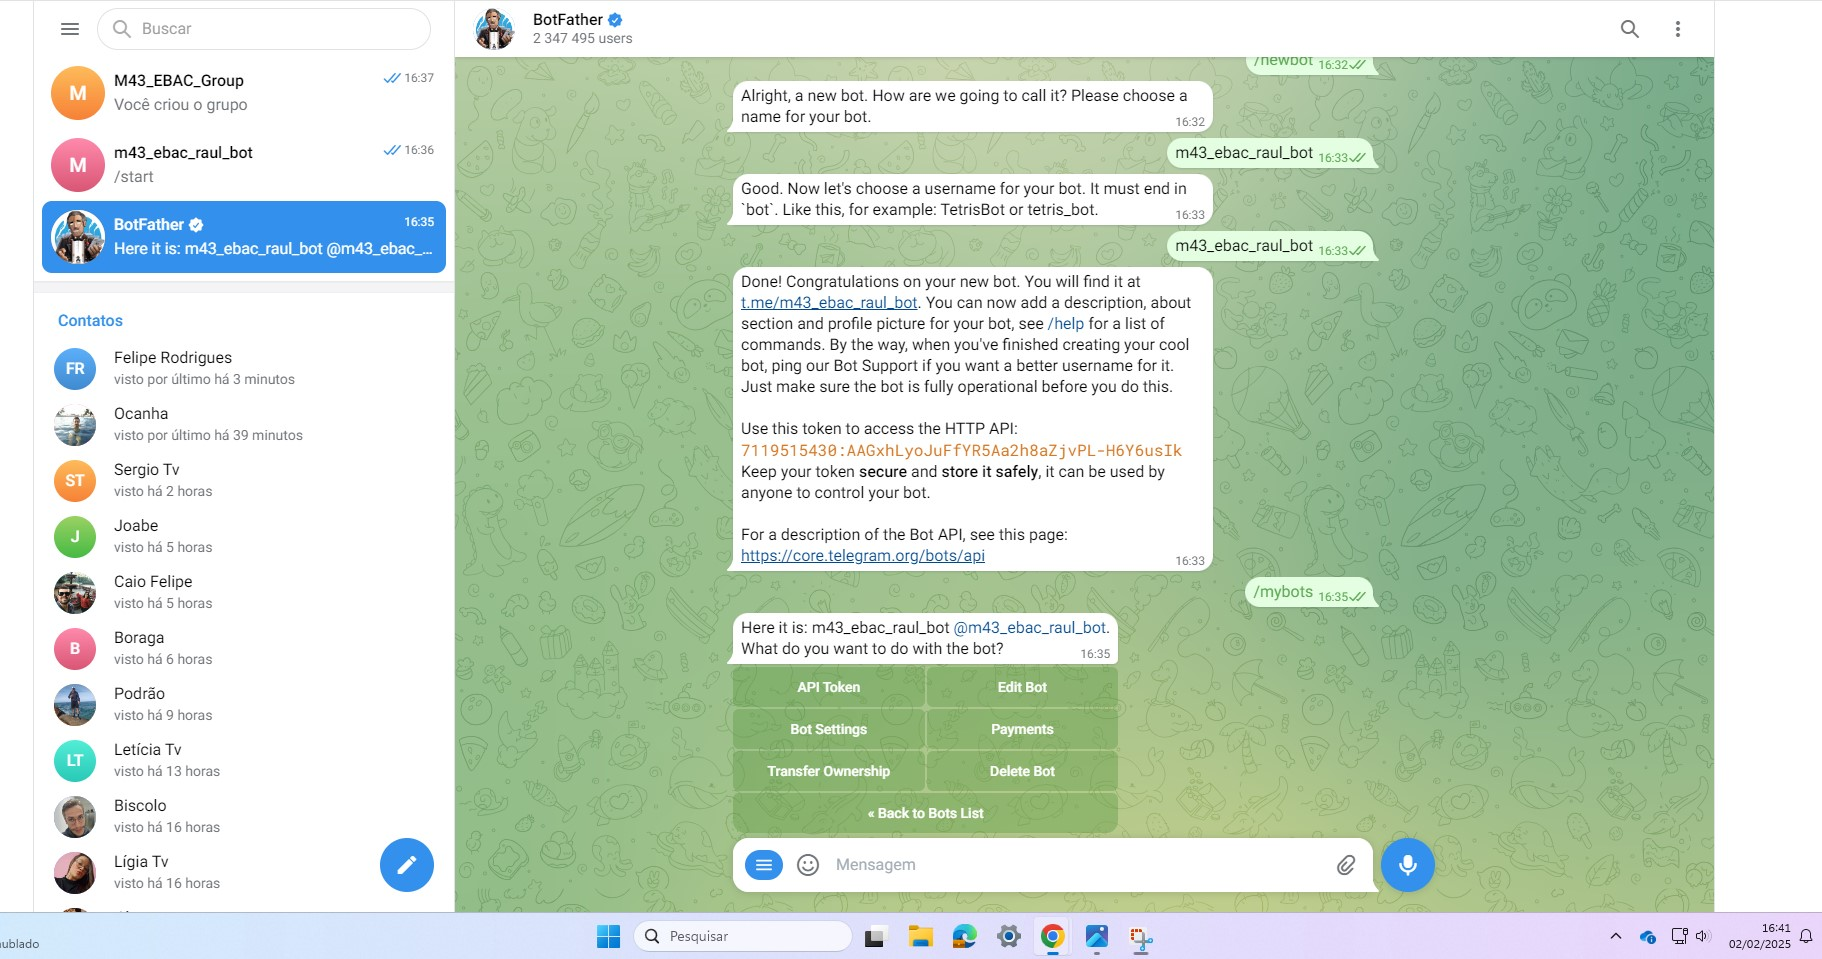

> **Imagem 2:** Criação Grupo

1.3. Crie um ***grupo*** e adicione o ***bot***.

1.4. Torne o ***bot*** administrador do grupo.

1.5. Desabilite a opção de adicionar o ***bot*** a novos grupos.

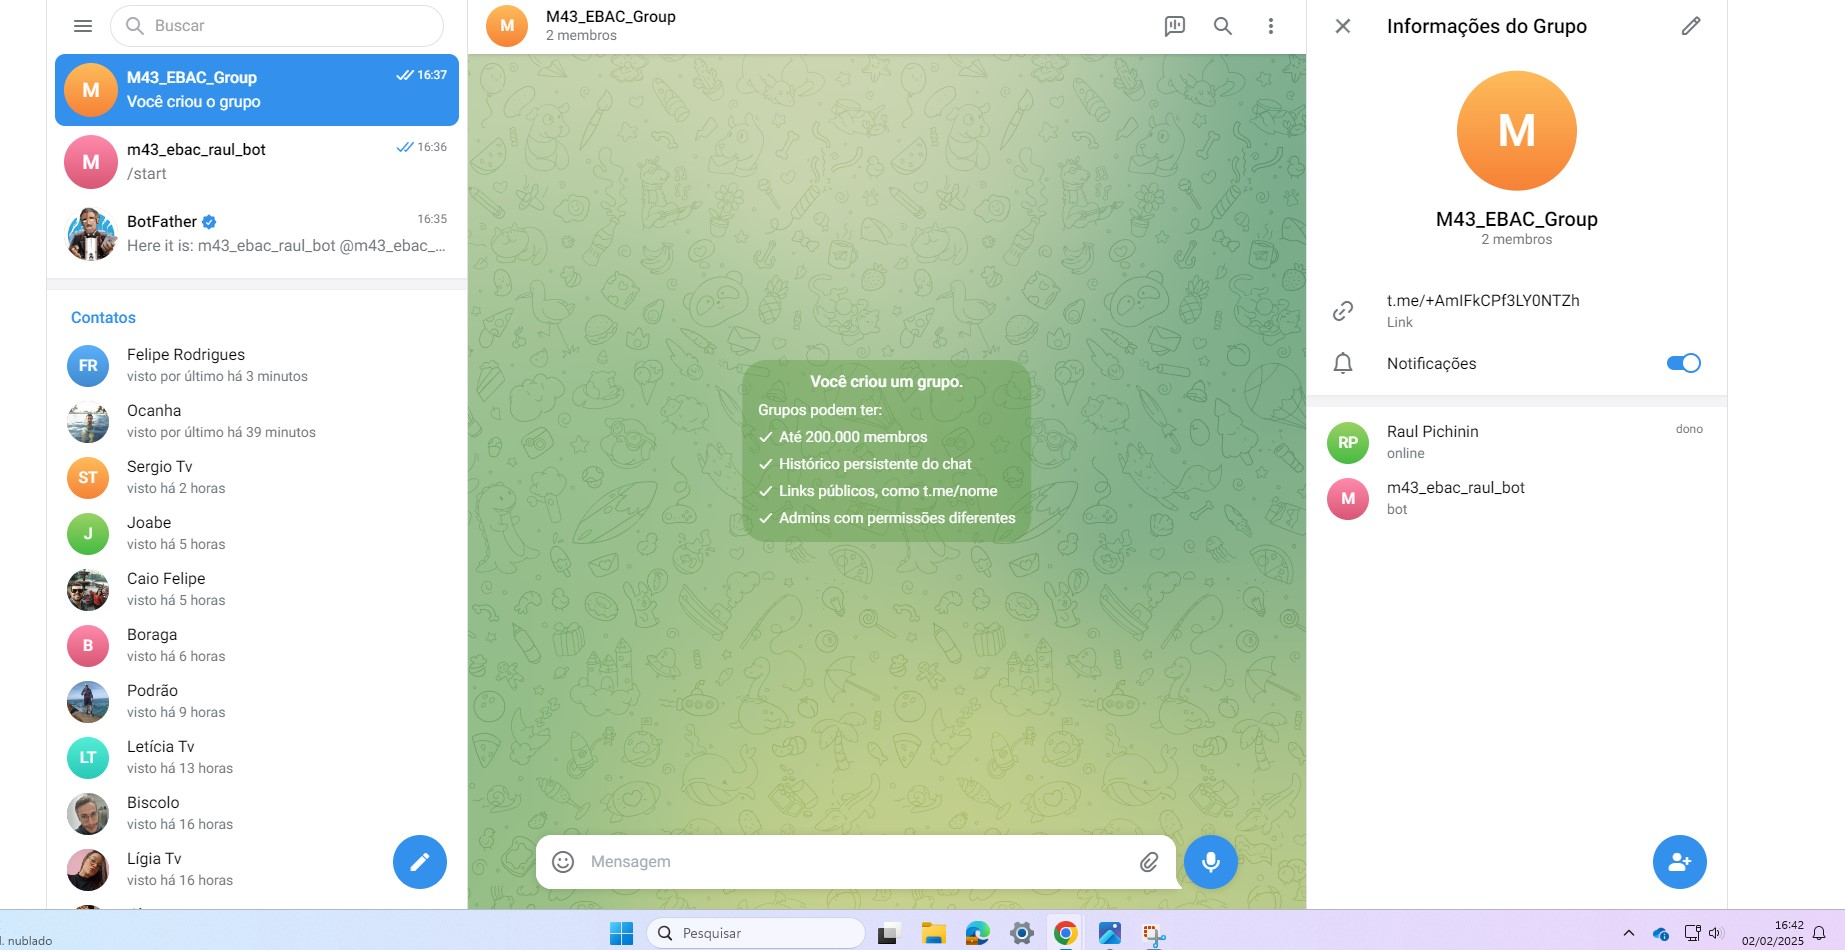

1.6. Envie diversos tipos de mensagens no grupo (text, imagem, arquivos, video, áudio, etc.) e as consuma utilizand a API de *bots* do **Telegram**.

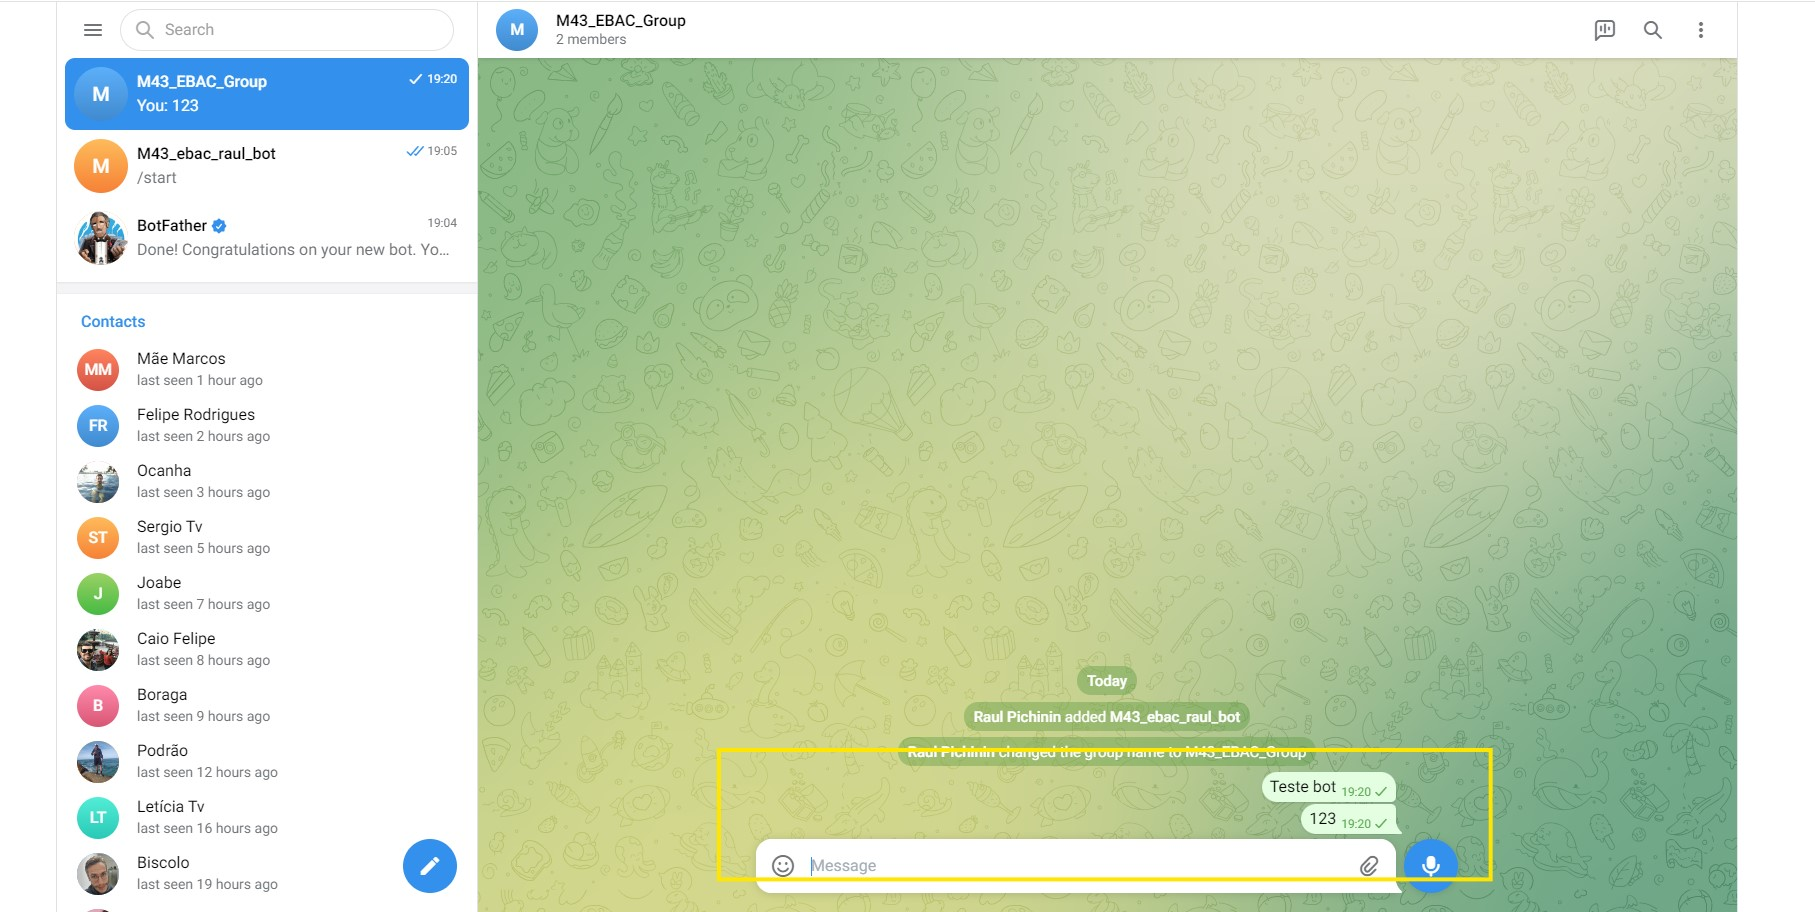

In [ ]:
from getpass import getpass
token = getpass()

··········


In [ ]:
import json
import requests
base_url = f'https://api.telegram.org/bot{token}'

In [ ]:
aws_api_gateway_url = getpass()

··········


**getMe**

O método getMe retorna informações sobre o bot.

In [ ]:
response = requests.get(url=f'{base_url}/getMe')
print(f'{base_url}/getMe')


https://api.telegram.org/bot7964202058:AAH5KDkv4Ul6HMBrJ4DXn0mR5SXgf80SspE/getMe


In [ ]:
print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": {
    "id": 7964202058,
    "is_bot": true,
    "first_name": "M43_ebac_raul_bot",
    "username": "m43_ebac_raul1_bot",
    "can_join_groups": true,
    "can_read_all_group_messages": false,
    "supports_inline_queries": false,
    "can_connect_to_business": false,
    "has_main_web_app": false
  }
}


**getUpdates**

O método getUpdates retorna as mensagens captadas pelo bot.

In [ ]:
response = requests.get(url=f'{base_url}/getUpdates')
print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": [
    {
      "update_id": 802603655,
      "message": {
        "message_id": 11,
        "from": {
          "id": 7112289376,
          "is_bot": false,
          "first_name": "Raul",
          "last_name": "Pichinin",
          "language_code": "pt-br"
        },
        "chat": {
          "id": -1002487963574,
          "title": "M43_EBAC_Group",
          "type": "supergroup"
        },
        "date": 1738693622,
        "text": "Abcteste"
      }
    },
    {
      "update_id": 802603656,
      "message": {
        "message_id": 12,
        "from": {
          "id": 7112289376,
          "is_bot": false,
          "first_name": "Raul",
          "last_name": "Pichinin",
          "language_code": "pt-br"
        },
        "chat": {
          "id": -1002487963574,
          "title": "M43_EBAC_Group",
          "type": "supergroup"
        },
        "date": 1738693636,
        "text": "Ol\u00e1 bot"
      }
    }
  ]
}


Telegram Vamos configurar o webhook para redirecionar as mensagens para a  url do  AWS API  Gateway.

**setwebnook**

O método setWebhook configura o redirecionamento das mensagens captadas pelo bot para o endereço web do parametro  url..



**Nota:** os métodos getUpdates e setWebhook são mutuamente exclusivos, ou seja, enquanto o webhook estiver ativo, o método getUpdates não funcionará. Para desativar o webhook, basta utilizar o método deleteWebhook.

In [ ]:
response = (requests .get(url=f'{base_url}/setWebhook?url={aws_api_gateway_url}'))
print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": true,
  "description": "Webhook was set"
}


In [ ]:
# prompt: deleteWebhook de response

#response = requests.get(url=f'{base_url}/deleteWebhook')
#print(json.dumps(json.loads(response.text), indent=2))

**getWebhookInfo**

O método getWebhookInfo retorna as informações sobre o webhook configurado.

In [ ]:
response = (requests .get(url=f'{base_url}/getWebhookInfo'))
print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": {
    "url": "https://7n5n9w9ag7.execute-api.sa-east-1.amazonaws.com/dev/",
    "has_custom_certificate": false,
    "pending_update_count": 0,
    "max_connections": 40,
    "ip_address": "54.94.173.218"
  }
}
